In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram



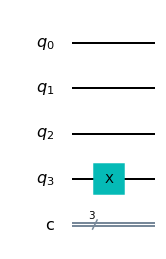

In [32]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw('mpl')

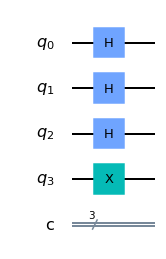

In [33]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

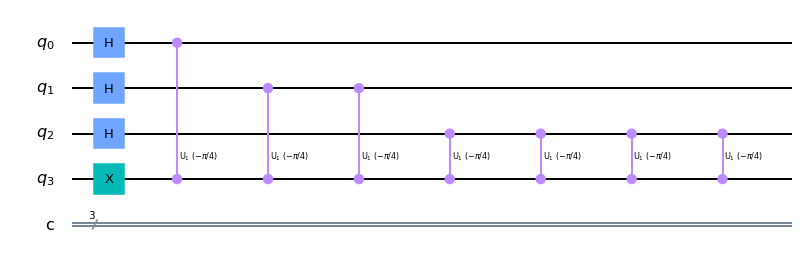

In [34]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(-math.pi/4, counting_qubit, 3);
    repetitions *= 2
qpe.draw('mpl')

In [35]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)


In [36]:
qpe.barrier()

qft_dagger(qpe, 3)

qpe.barrier()
for n in range(3):
    qpe.measure(n,n)


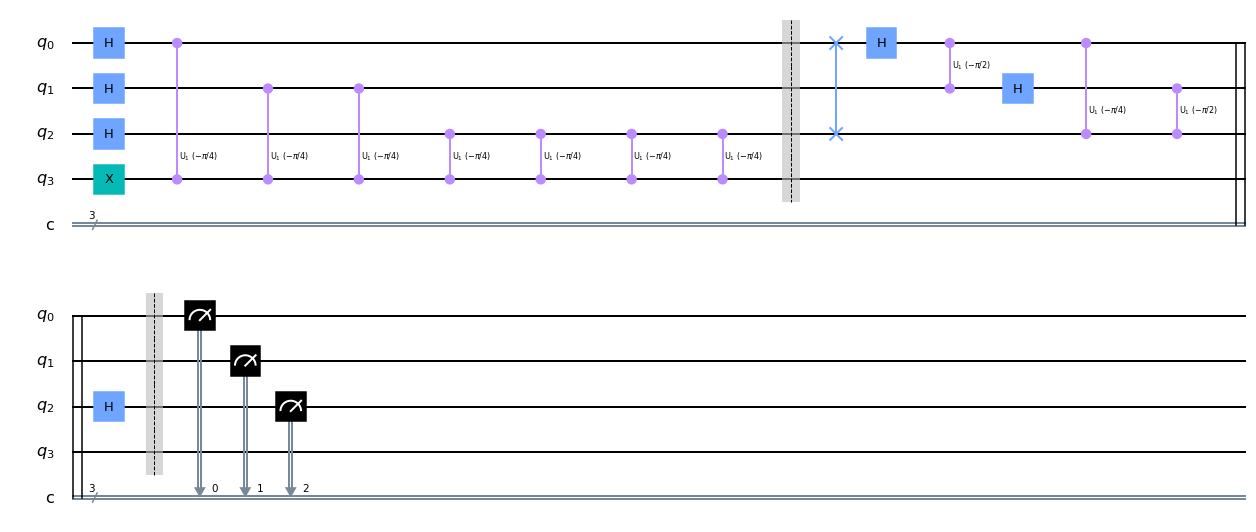

In [37]:
qpe.draw('mpl')

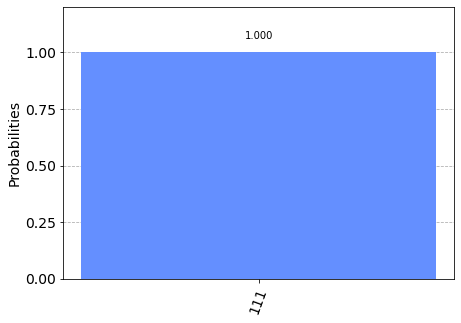

In [38]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

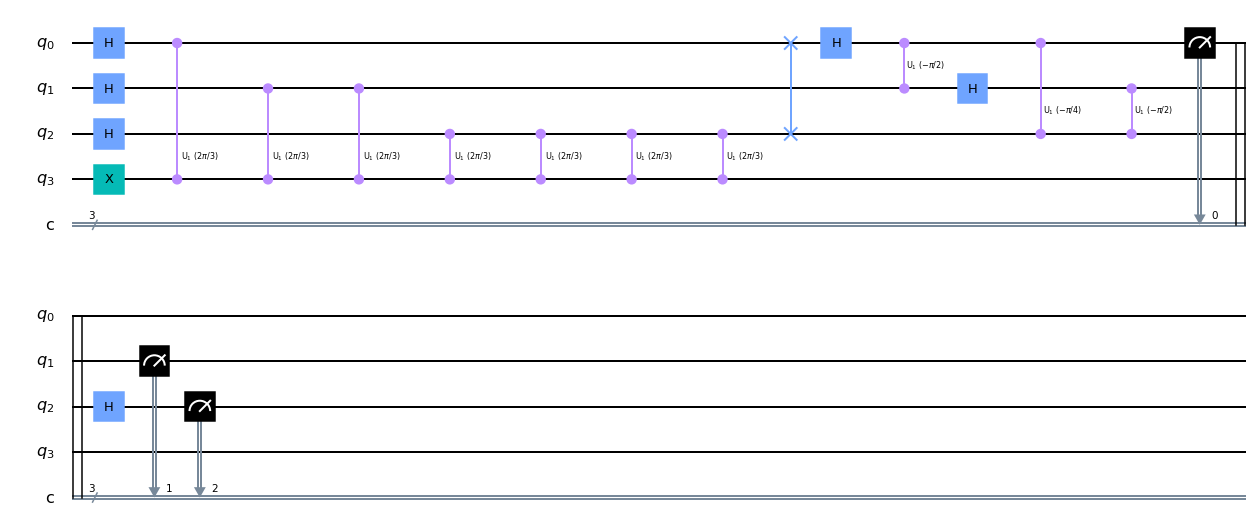

In [12]:
qpe2= QuantumCircuit(4, 3)

for qubit in range(3):
    qpe2.h(qubit)

qpe2.x(3)

angle = 2 * math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3);
    repetitions *= 2 # really no sure what this means :)

qft_dagger(qpe2, 3)

for n in range(3):
    qpe2.measure(n, n)

qpe2.draw('mpl')

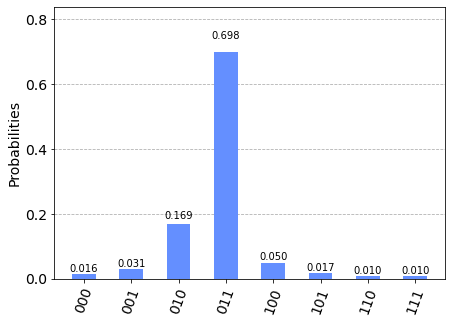

In [14]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer)

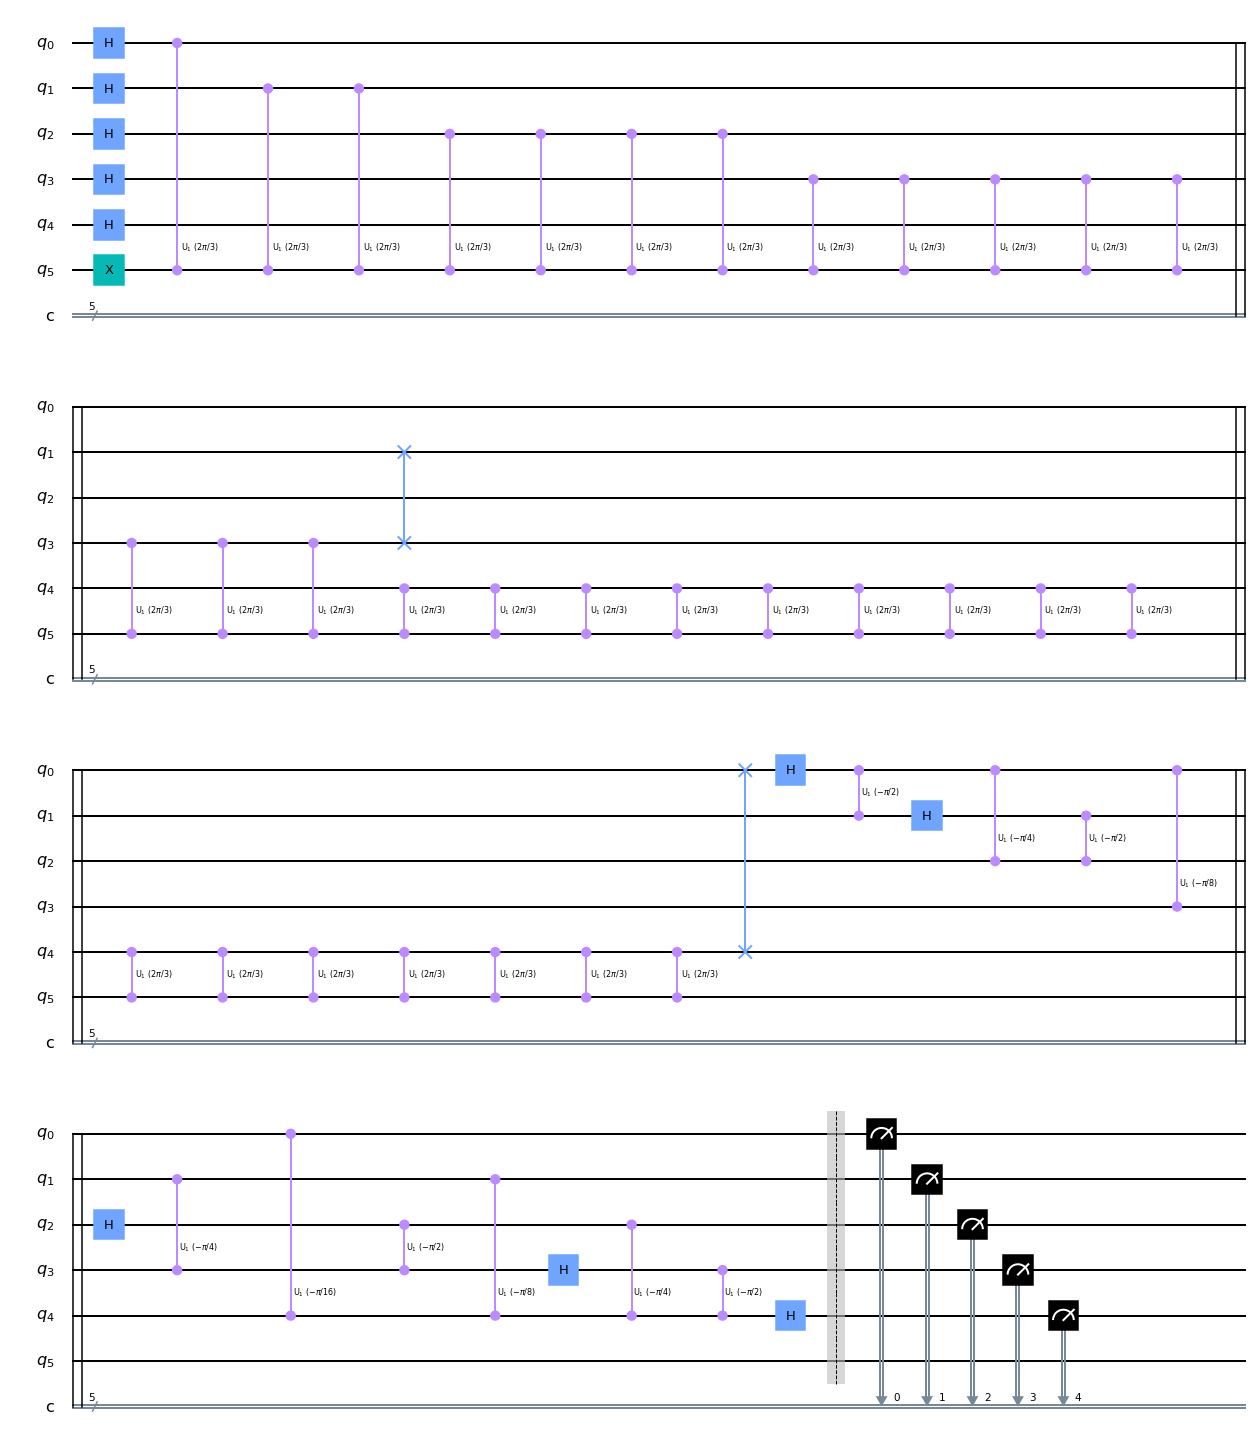

In [16]:
qpe3 = QuantumCircuit(6, 5)

for qubit in range(5):
    qpe3.h(qubit)

qpe3.x(5)

angle = 2 * math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 5)
    repetitions *= 2
    
qft_dagger(qpe3, 5)

qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw('mpl')

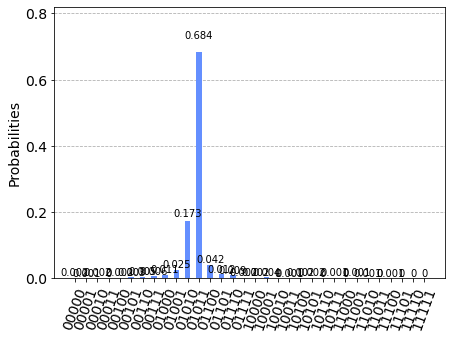

In [17]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

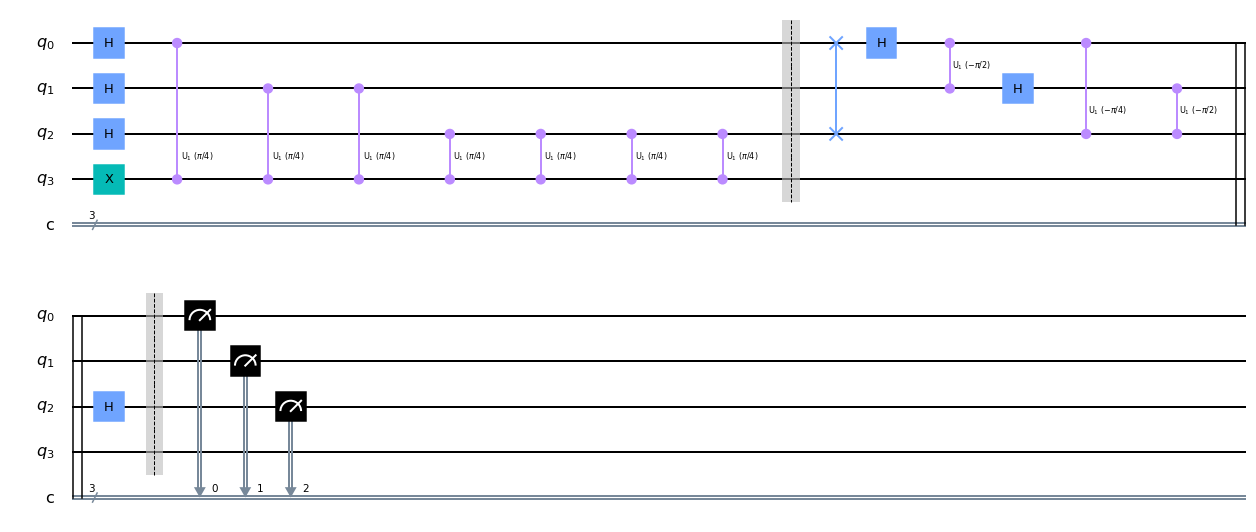

In [18]:
qpe.draw('mpl')

In [22]:
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_vigo')

ibmqfactory.load_account:WARNING:2020-10-06 04:03:53,958: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
shots = 2048
job = execute(qpe, backend = backend, shots = 2048, optimization_level = 3)
job_monitor(job)

Job Status: job has successfully run


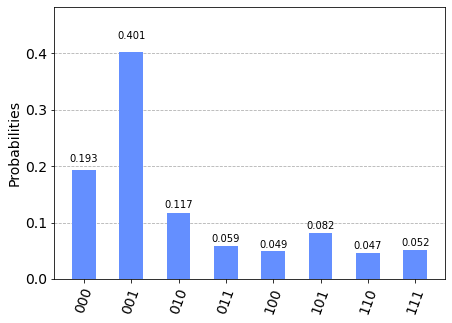

In [24]:
results = job.result()
answer = results.get_counts(qpe)
plot_histogram(answer)

In [39]:
# exercises :(

# hmm if T_dagger I would assume is -2pi/8
# and the answer is 7/8 that is correct i guess
# so 2ipi(Angle) -> T -> 2ipi/8
# then 2ipi(Angle) -> T_dagger -> -2ipi/8
# then Angle = -1/8 (2ipi) + 1 (2ipi) = 7/8 (2ipi)
# maybe

# if CNOT ?

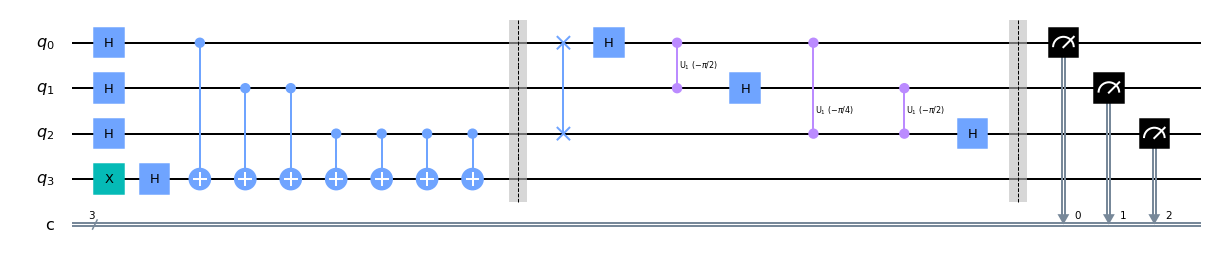

In [56]:
# if CNOT ?
# is it pi/2 or just CX?
# no pi/2 is an S gate, hmm maybe just pi then
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.h(3) # maybe add hadamard basis for CNOT then it 
# woult rotate by pi -> 4/8 halfway
# guesswork no idea what i'm doing :)
for qubit in range(3):
    qpe.h(qubit)
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cx(counting_qubit, 3);
    repetitions *= 2
qpe.barrier()

qft_dagger(qpe, 3)

qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw('mpl')


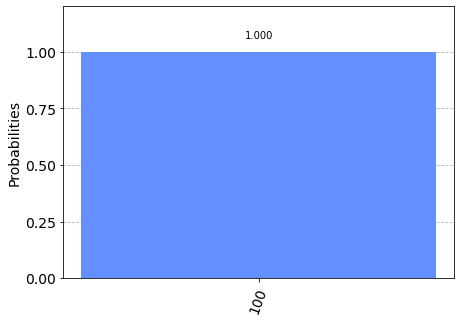

In [57]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

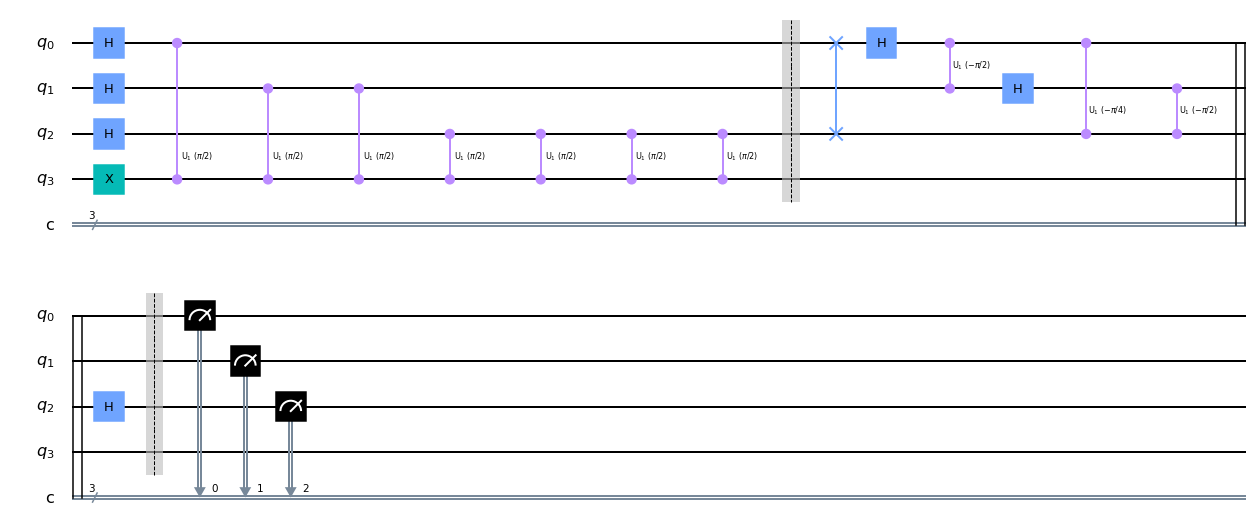

In [54]:
# if S = T^2 = pi/2 ?
# we expect 2/8 or same 010
qpe = QuantumCircuit(4, 3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/2, counting_qubit, 3);
    repetitions *= 2
qpe.barrier()

qft_dagger(qpe, 3)

qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw('mpl')


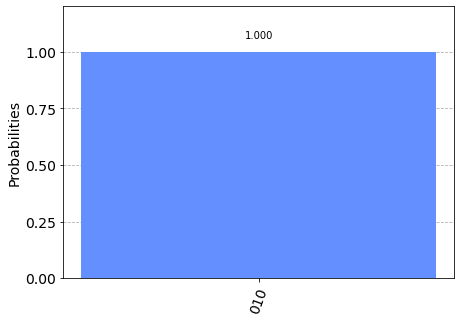

In [55]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

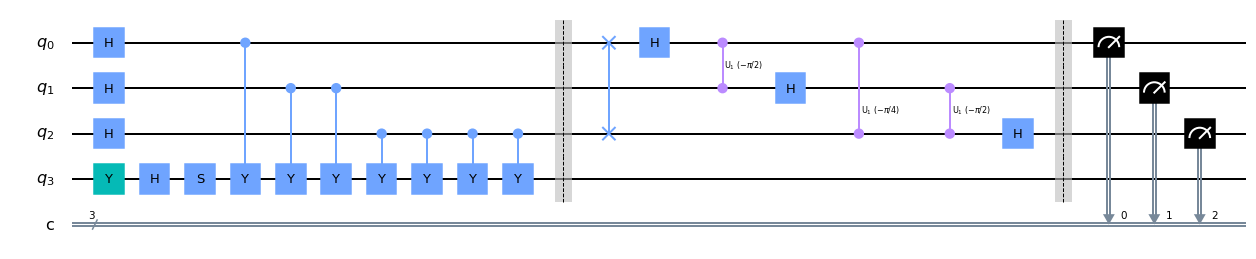

In [82]:
# if Y gate ...

qpe = QuantumCircuit(4, 3)
qpe.y(3)
qpe.h(3)
#oh just adding H-gate doesn't work :)
# so what do we do?
# what is an eigenstate of Y?
# I would stil want to get 4/8 but hmm
# so to rotate between x and z - axis i need H
# ok to rotate between x and y i need HS
qpe.s(3)
for qubit in range(3):
    qpe.h(qubit)
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cy(counting_qubit, 3);
    repetitions *= 2
qpe.barrier()

qft_dagger(qpe, 3)

qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw('mpl')


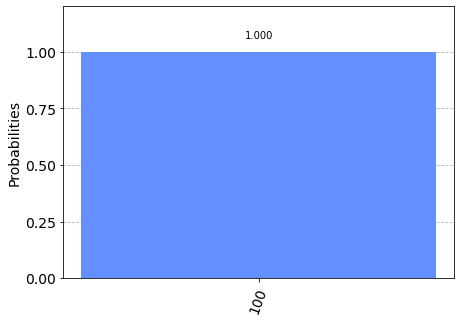

In [83]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)